In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
data_product = pd.read_excel('茶叶产品信息1.xlsx')

In [3]:
data_product.head()

,prod_id,prod_name,url,shop_id,shop_starttime,shop_fans,prod_fans,credit_level,capture_time,净含量,包装方式,包装种类,茶种类,产地,套餐份量,套餐周期,配送频次,价格段,适用季节,级别
0,562294924952,带茶具 金骏眉红茶 茶叶礼盒装蜜香2018新茶武夷山特级金俊眉袋装,http://item.taobao.com/item.htm?id=562294924952,2255744697,5,3084,1764,13,2018-10-23 18:36:29,330.0,包装,礼盒装,金骏眉,中国大陆 福建省 泉州市,NaN,NaN,NaN,NaN,NaN,NaN
1,41410066387,绿之素精品哥伦比慧兰咖啡豆 生咖啡豆烘焙可磨粉买一送一,http://item.taobao.com/item.htm?id=41410066387,2200956328,5,1703,14,11,2019-05-27 17:24:05,227.0,包装,NaN,哥伦比亚咖啡,中国大陆 上海,1人,1个月,NaN,NaN,NaN,NaN
2,574464883007,茉莉茶王 2018新茶 广西横县特级茉莉花茶 浓香茉莉花茶 散装茶叶,http://item.taobao.com/item.htm?id=574464883007,1914557054,4,1707,0,8,2018-10-23 19:13:49,500.0,散装,NaN,茉莉花,中国大陆 广西壮族自治区 百色市,5人,12个月,1周2次,500元以上,"冬季,春季,夏季,秋季",NaN
3,577739403010,茗翔昊 新会陈皮柑普洱茶宫廷熟茶礼盒送礼装茶叶,http://item.taobao.com/item.htm?id=577739403010,360608231,10,21000,0,14,2018-10-16 18:25:16,360.0,包装,礼盒装,普洱茶,中国大陆 云南省 昆明市,2人,1个月,1周2次,500元以上,NaN,NaN
4,578617442080,袋装佳茗好品质铁观音精美礼品茶叶浓香型安溪原产地农家世代制茶,http://item.taobao.com/item.htm?id=578617442080,515164907,9,194,2,8,2018-10-24 09:44:34,500.0,食用农产品,NaN,铁观音,中国大陆 福建省 泉州市,5人,12个月,1周1次,200-299元,秋季,特级


In [4]:
data_product = data_product.drop(['prod_name','url','capture_time'],axis=1)

In [5]:
data_product.head()

,prod_id,shop_id,shop_starttime,shop_fans,prod_fans,credit_level,净含量,包装方式,包装种类,茶种类,产地,套餐份量,套餐周期,配送频次,价格段,适用季节,级别
0,562294924952,2255744697,5,3084,1764,13,330.0,包装,礼盒装,金骏眉,中国大陆 福建省 泉州市,NaN,NaN,NaN,NaN,NaN,NaN
1,41410066387,2200956328,5,1703,14,11,227.0,包装,NaN,哥伦比亚咖啡,中国大陆 上海,1人,1个月,NaN,NaN,NaN,NaN
2,574464883007,1914557054,4,1707,0,8,500.0,散装,NaN,茉莉花,中国大陆 广西壮族自治区 百色市,5人,12个月,1周2次,500元以上,"冬季,春季,夏季,秋季",NaN
3,577739403010,360608231,10,21000,0,14,360.0,包装,礼盒装,普洱茶,中国大陆 云南省 昆明市,2人,1个月,1周2次,500元以上,NaN,NaN
4,578617442080,515164907,9,194,2,8,500.0,食用农产品,NaN,铁观音,中国大陆 福建省 泉州市,5人,12个月,1周1次,200-299元,秋季,特级


In [6]:
data_shop = pd.read_excel('茶叶店铺信息.xlsx')

In [7]:
data_shop.head()

,shop_id,shop_name,type,url,addr,seller,company,start_time
0,43257451,好茶缘茶叶店,淘宝,http://shop33846503.taobao.com,浙江 金华 婺城区,郑健美,NaN,NaN
1,1873248616,山东特产 正品阿胶,淘宝,http://shop112170357.taobao.com,山东 济南 平阴县,正品销售4,NaN,NaN
2,1137030886,硒都恩施特产中心,企业店铺,http://shop104705111.taobao.com,湖北 恩施 恩施市,马潮波a,NaN,6.0
3,94526339,北京钓鱼台精品店,淘宝,http://shop35768403.taobao.com,北京 海淀区,zhuomei200888,NaN,11.0
4,392872917,羌家小店,淘宝,http://shop61163331.taobao.com,四川 绵阳 北川羌族自治县,dengding518,NaN,9.0


In [8]:
data_shop = data_shop.drop(['shop_name','url','seller','company'],axis=1)

In [9]:
data_shop.head()

,shop_id,type,addr,start_time
0,43257451,淘宝,浙江 金华 婺城区,NaN
1,1873248616,淘宝,山东 济南 平阴县,NaN
2,1137030886,企业店铺,湖北 恩施 恩施市,6.0
3,94526339,淘宝,北京 海淀区,11.0
4,392872917,淘宝,四川 绵阳 北川羌族自治县,9.0


In [10]:
data_buy = pd.read_excel('茶叶交易信息.xlsx')

In [11]:
data_buy.head()

,prod_id,prod_name,addr,price_01,price_02,price_03,price_04,price_05,price_06,price_07,...,price_09,month_amount_01,month_amount_02,month_amount_03,month_amount_04,month_amount_05,month_amount_06,month_amount_07,month_amount_08,month_amount_09
0,522651389510,毛尖蘑,黑龙江 大兴安岭 归口大兴安岭,120.0,120.0,120.0,120.0,120.0,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,39799836746,华彤6个装礼盒正宗新会柑普茶陈皮普洱茶熟茶送礼品茶叶,广东 江门 新会区,NaN,NaN,NaN,NaN,148.0,148.0,148.0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN
2,578325469761,大益普洱茶甜醇普洱熟茶饼茶四年陈紧压茶云南勐海300g茶叶*3饼,北京 海淀区,338.0,378.0,338.0,338.0,378.0,338.0,NaN,...,NaN,34.0,22.0,26.0,4.0,4.0,0.0,NaN,0.0,NaN
3,564103628459,喜庆过年年货礼盒包装盒红茶大红袍包装盒空礼盒普洱茶饼包装盒,江西 萍乡 湘东区,NaN,NaN,20.0,20.0,20.0,20.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,582196620578,新品包邮黑茶湖南安化天尖茶谷雨春茶一级黑茶散茶纯料黑茶私房茶,广东 广州 荔湾区,59.0,39.0,39.0,69.0,69.0,NaN,NaN,...,NaN,3.0,2.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
data_buy = data_buy.drop(['prod_name'],axis=1)

In [13]:
data_buy.head()

,prod_id,addr,price_01,price_02,price_03,price_04,price_05,price_06,price_07,price_08,price_09,month_amount_01,month_amount_02,month_amount_03,month_amount_04,month_amount_05,month_amount_06,month_amount_07,month_amount_08,month_amount_09
0,522651389510,黑龙江 大兴安岭 归口大兴安岭,120.0,120.0,120.0,120.0,120.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,39799836746,广东 江门 新会区,NaN,NaN,NaN,NaN,148.0,148.0,148.0,148.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN
2,578325469761,北京 海淀区,338.0,378.0,338.0,338.0,378.0,338.0,NaN,699.0,NaN,34.0,22.0,26.0,4.0,4.0,0.0,NaN,0.0,NaN
3,564103628459,江西 萍乡 湘东区,NaN,NaN,20.0,20.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,582196620578,广东 广州 荔湾区,59.0,39.0,39.0,69.0,69.0,NaN,NaN,NaN,NaN,3.0,2.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:
data_comp = pd.read_excel('茶叶企业信息数据类.xlsx')

In [17]:
data_comp.head()

,company_id,company_name,address,capital,status,founding_time,legal_person,url
0,8434157,湖南惟楚福瑞达生物科技有限公司,益阳市高新区梅林路61号,6333.330000万,存续,6,刘德,http://www.qichacha.com/firm_a7f72e1b1723e994f...
1,8340479,陕西昌盛德商贸有限公司,陕西省西安市经开区未央路以西凤城五路南侧富力广场赛高国际街区3幢2单元5层215...,300万,开业,6,强超,http://www.qichacha.com/firm_4781b7cc89412905c...
2,8340383,石家庄市淘达商贸有限公司,河北省石家庄市桥西区大经街28号中山华府2号商务楼2715,100万,存续（在营、开业、在册）,9,董彦,http://www.qichacha.com/firm_d60b4033deeea63c8...
3,8442993,西安虎标茶果土产食品有限公司,西安市高新区造字台路109号初元科技产业园B座302室,1150万,开业,17,李建文,http://www.qichacha.com/firm_15b52faaa14e8902e...
4,8375386,深圳前海一味生物科技有限公司,深圳市前海深港合作区前湾一路1号A栋201室(入驻深圳市前海商务秘书有限公司)经...,500万,存续（在营、开业、在册）,6,盘其伟,http://www.qichacha.com/firm_d8ae40ef5bc100ef2...


In [18]:
data_comp = data_comp.drop(['company_name','legal_person','url'],axis=1)

In [19]:
data_comp.head()

,company_id,address,capital,status,founding_time
0,8434157,益阳市高新区梅林路61号,6333.330000万,存续,6
1,8340479,陕西省西安市经开区未央路以西凤城五路南侧富力广场赛高国际街区3幢2单元5层215...,300万,开业,6
2,8340383,河北省石家庄市桥西区大经街28号中山华府2号商务楼2715,100万,存续（在营、开业、在册）,9
3,8442993,西安市高新区造字台路109号初元科技产业园B座302室,1150万,开业,17
4,8375386,深圳市前海深港合作区前湾一路1号A栋201室(入驻深圳市前海商务秘书有限公司)经...,500万,存续（在营、开业、在册）,6


In [2]:
dataset = pd.read_excel('茶叶数据集.xls')

In [3]:
dataset.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,品牌,茶种类,省份,城市,包装方式,包装种类,净含量,商品详情,原产地,收益
0,2020新茶上市八马茶叶明前龙井绿茶特级浙江龙井春茶125g,158.0,八马旗舰店,广东深圳,334,334,871.0,八马,浙江龙井,浙江省,杭州市,包装,罐装,125,产品参数：\n生产许可证编号：SC11433010613458\n厂名：杭州正一心茶业有限公...,0,52772.0
1,王氏雄风2020年新茶正宗西湖泉龙井茶特级明前绿茶散装茶叶500g,488.0,王氏雄风茶业,福建泉州,7642,7352,6874.0,王氏雄风,西湖龙井,浙江省,杭州市,包装,罐装,500,生产许可证编号:SC11433010613667\n厂名:杭州绿颐茶业有限公司\n厂址:浙江...,0,3729296.0
2,闽丹2020新茶正宗杭州西湖龙井茶叶特级明前雨前绿茶散礼盒装300g,368.0,闽丹茶叶旗舰店,浙江杭州,6677,6677,6086.0,闽丹,西湖龙井,浙江省,杭州市,包装,罐装,300,产品参数：\n生产许可证编号：SC11433010613667\n厂名：杭州绿颐茶业有限公司...,1,2457136.0
3,正山王2020新茶正宗明前浓香龙井茶叶500g西湖区绿茶高山龙井春茶,280.0,正山王旗舰店,福建泉州,2546,2546,3709.0,正山王,钱塘龙井,浙江省,杭州市,包装,罐装,500,产品参数：\n生产许可证编号：SC11433010613667\n厂名：杭州绿颐茶业有限公司...,0,712880.0
4,2020年新茶杭州西湖泉牌龙井茶特级明前绿茶散装礼盒装茶叶500g,258.0,王氏雄风茶业,浙江杭州,8404,41590,17118.0,王氏雄风,西湖龙井,浙江省,杭州市,包装,罐装,500,生产许可证编号:SC11433010613667\n厂名:杭州绿颐茶业有限公司\n厂址:浙江...,1,2168232.0


In [4]:
dataset = dataset.drop(['商品名','店铺名称','商品详情','店铺位置','省份','城市'],axis=1)

In [5]:
t = list(dataset['品牌'].unique())

In [6]:
dataset = dataset.drop(['品牌'],axis=1)

In [7]:
dataset.head()

,单价/元,商品月销,商品评论数,商品人气,茶种类,包装方式,包装种类,净含量,原产地,收益
0,158.0,334,334,871.0,浙江龙井,包装,罐装,125,0,52772.0
1,488.0,7642,7352,6874.0,西湖龙井,包装,罐装,500,0,3729296.0
2,368.0,6677,6677,6086.0,西湖龙井,包装,罐装,300,1,2457136.0
3,280.0,2546,2546,3709.0,钱塘龙井,包装,罐装,500,0,712880.0
4,258.0,8404,41590,17118.0,西湖龙井,包装,罐装,500,1,2168232.0


In [9]:
print(dataset.dtypes)

单价/元      int32
商品月销      int64
商品评论数     int64
商品人气      int32
茶种类      object
包装方式     object
包装种类     object
净含量       int64
原产地       int64
收益        int32
dtype: object


In [10]:
dataset.isin(['none']).sum()

单价/元      0
商品月销      0
商品评论数     0
商品人气      0
茶种类       0
包装方式      0
包装种类     80
净含量       0
原产地       0
收益        0
dtype: int64

In [11]:
dataset.replace('none',0,inplace=True)

In [12]:
dataset.isin(['none']).sum()

单价/元     0
商品月销     0
商品评论数    0
商品人气     0
茶种类      0
包装方式     0
包装种类     0
净含量      0
原产地      0
收益       0
dtype: int64

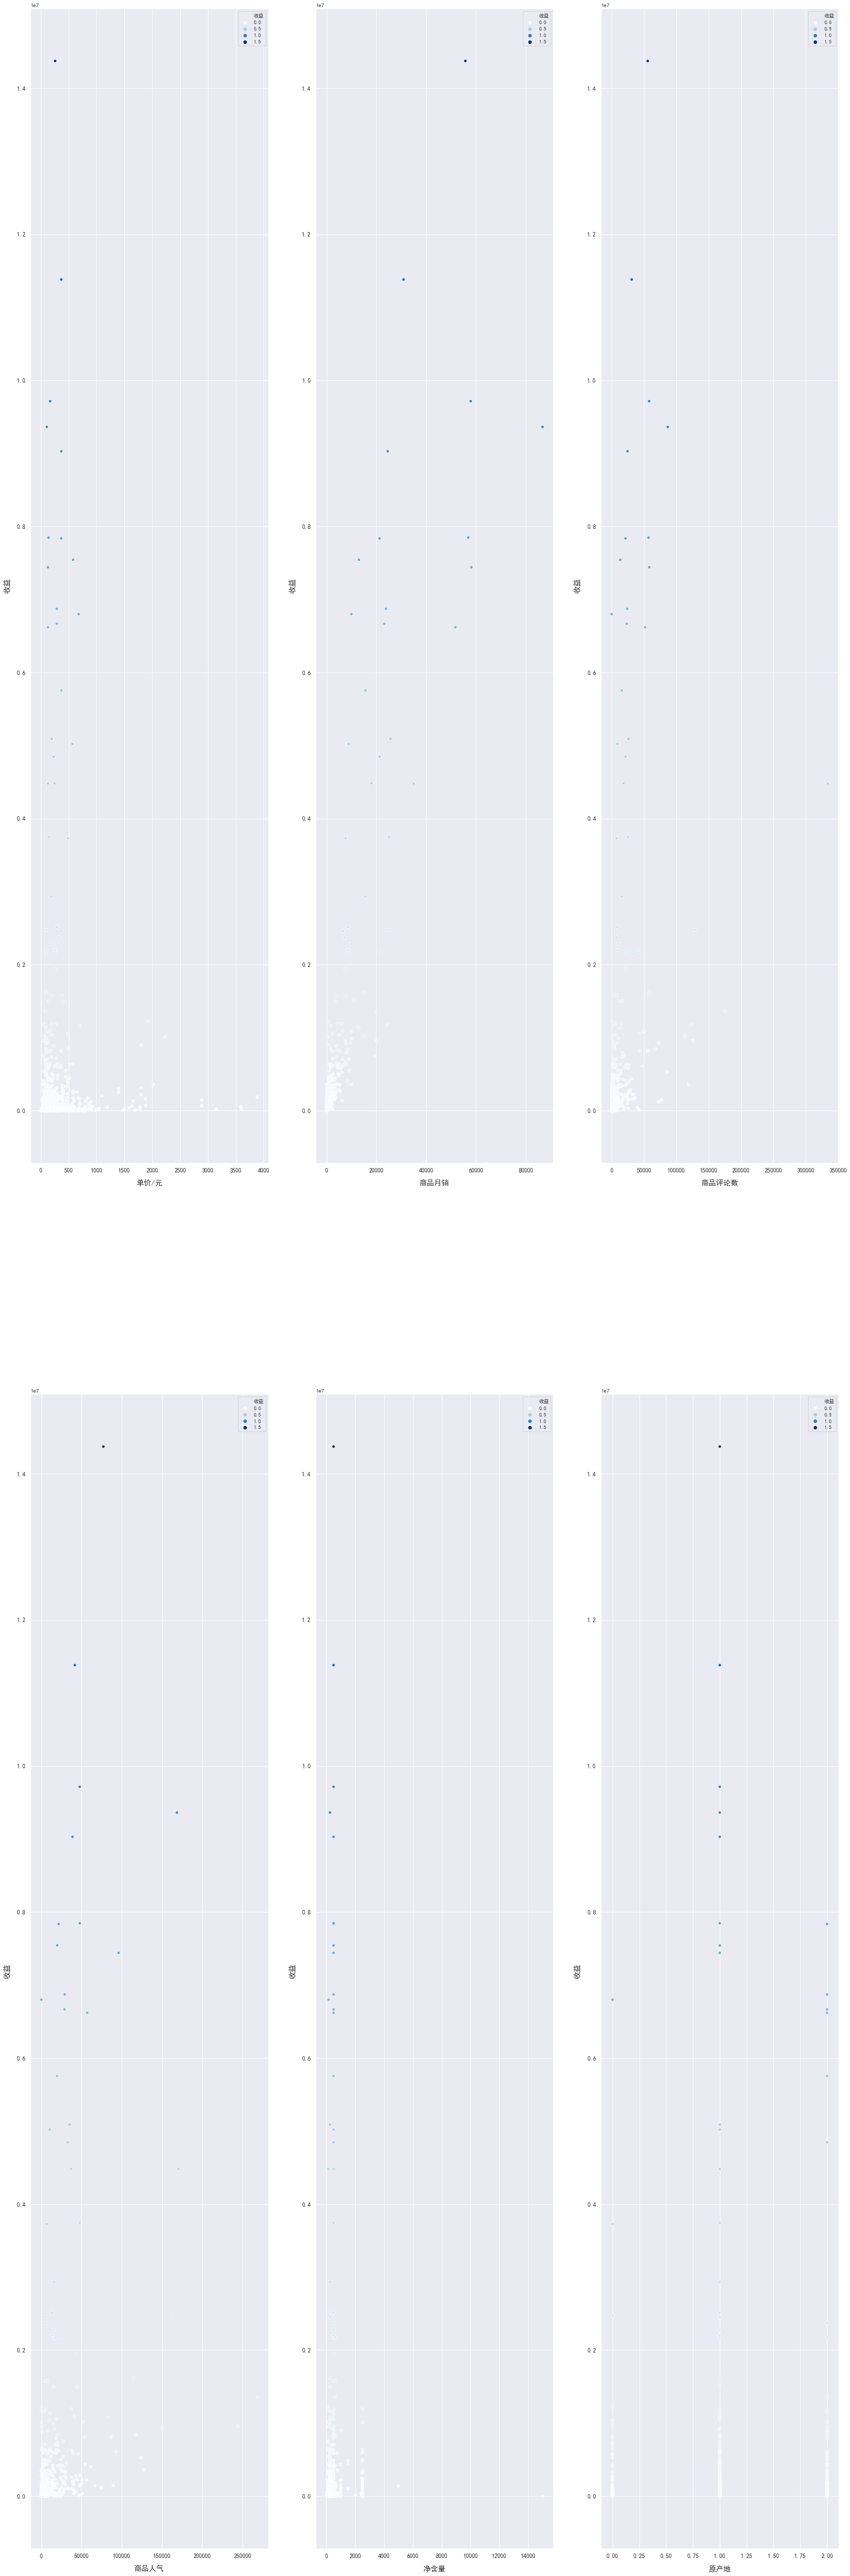

In [13]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

numeric_dtypes = ['int32','int64']
numeric = []
for i in dataset.columns:
    if dataset[i].dtype in numeric_dtypes:
        if i in ['收益']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(dataset[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='收益', hue='收益', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('收益', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

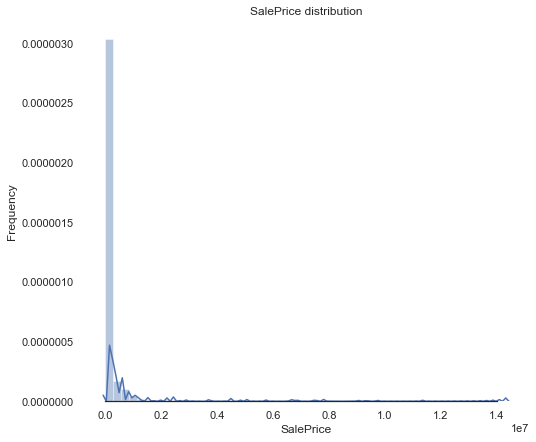

In [14]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [15]:
# log(1+x) transform
dataset["收益"] = np.log1p(dataset["收益"])


 mu = 9.95 and sigma = 2.31



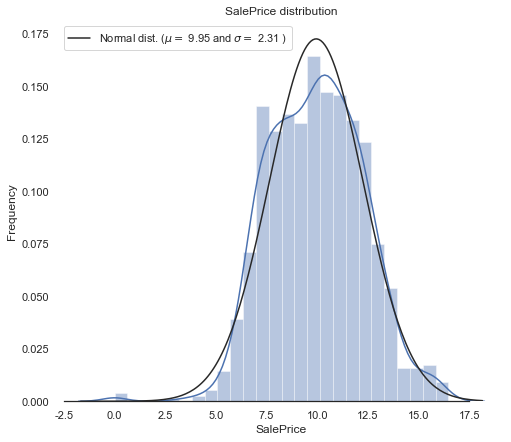

In [16]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(dataset['收益'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['收益'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [17]:
s1 = list(dataset['茶种类'].unique())
s2 = list(dataset['包装方式'].unique())
s3 = list(dataset['包装种类'].unique())
print(s1," ",s2," ",s3)
x1 = pd.DataFrame(dataset['茶种类'].value_counts())
x2 = pd.DataFrame(dataset['包装方式'].value_counts())
x3 = pd.DataFrame(dataset['包装种类'].value_counts())
print(x1,' ',x2,' ',x3)

['浙江龙井', '西湖龙井', '钱塘龙井', '大佛龙井', '安吉白茶', '越州龙井', '开化龙顶', '金骏眉', '铁观音', '正山小种', '大红袍', '碧螺春', '雀舌', '太平猴魁', '祁门红茶', '黄山毛峰', '六安瓜片', '苦丁茶', '峨眉山茶', '峨眉毛峰', '蒙顶甘露', '蒙顶毛峰', '茉莉花', '蒙顶石花', '普洱熟茶', '普洱生茶', '滇红']   ['包装', '散装', '食用农产品', '袋装']   ['罐装', '散装', '礼盒装', '袋装', 0, '盒装', '常规棉纸包装', '竹笋壳装']
      茶种类
碧螺春   195
普洱熟茶  135
雀舌    116
铁观音   108
黄山毛峰   96
安吉白茶   94
普洱生茶   63
西湖龙井   58
太平猴魁   52
金骏眉    45
祁门红茶   43
正山小种   42
蒙顶甘露   26
钱塘龙井   25
蒙顶毛峰   21
浙江龙井   19
苦丁茶    13
峨眉毛峰   13
茉莉花    12
六安瓜片   10
大红袍     5
滇红      2
越州龙井    2
蒙顶石花    2
峨眉山茶    2
大佛龙井    1
开化龙顶    1          包装方式
包装      717
食用农产品   311
袋装      101
散装       72           包装种类
罐装       327
礼盒装      306
散装       161
袋装       126
盒装       104
0         80
常规棉纸包装    69
竹笋壳装      28


In [18]:
dataset['茶种类'] = dataset['茶种类'].map({'浙江龙井':0, '西湖龙井':1, '钱塘龙井':2, '大佛龙井':3, '安吉白茶':4, '越州龙井':5, '开化龙顶':6, '金骏眉':7, '铁观音':8, '正山小种':9, '大红袍':10, '碧螺春':11, '雀舌':12, '太平猴魁':13, '祁门红茶':14, '黄山毛峰':15, '六安瓜片':16, '苦丁茶':17, '峨眉山茶':18, '峨眉毛峰':19, '蒙顶甘露':20, '蒙顶毛峰':21, '茉莉花':22, '蒙顶石花':23, '普洱熟茶':24, '普洱生茶':25, '滇红':26})
dataset['包装方式'] = dataset['包装方式'].map({'包装':0, '散装':1, '食用农产品':2, '袋装':3})
dataset['包装种类'] = dataset['包装种类'].map({'罐装':1, '散装':2, '礼盒装':3, '袋装':4, '盒装':5, '常规棉纸包装':6, '竹笋壳装':7})

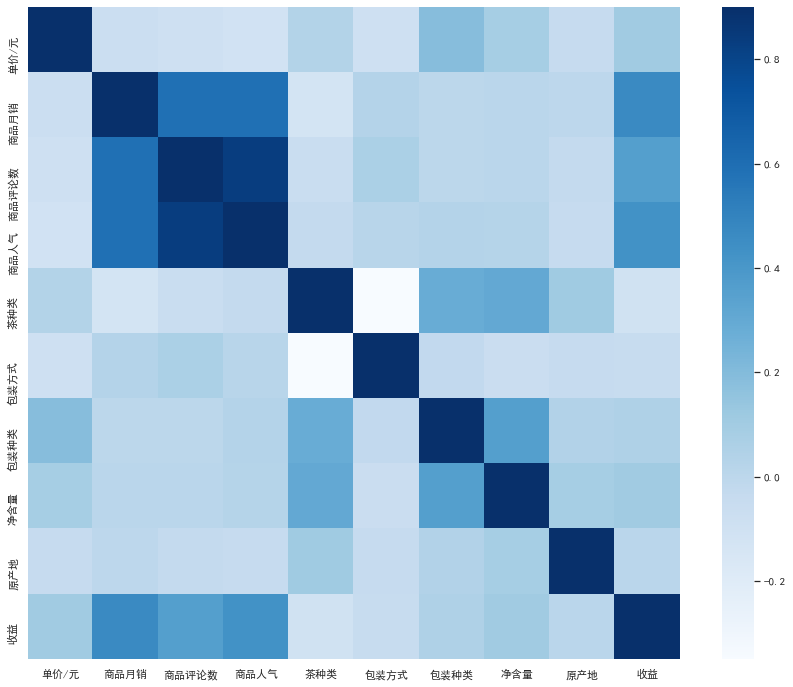

In [19]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

corr = dataset.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [20]:
ss = MinMaxScaler()
scale_features = ['单价/元','商品月销','商品评论数','商品人气','茶种类','包装方式','包装种类','净含量','原产地']
dataset[scale_features] = ss.fit_transform(dataset[scale_features])

In [21]:
dataset.head()

,单价/元,商品月销,商品评论数,商品人气,茶种类,包装方式,包装种类,净含量,原产地,收益
0,0.038412,0.003853,0.000999,0.003239,0.000000,0.0,0.0,0.007675,0.0,10.873755
1,0.123485,0.088157,0.021998,0.025585,0.038462,0.0,0.0,0.032702,0.0,15.131730
2,0.092550,0.077025,0.019978,0.022652,0.038462,0.0,0.0,0.019354,0.5,14.714507
3,0.069863,0.029370,0.007618,0.013803,0.076923,0.0,0.0,0.032702,0.0,13.477070
4,0.064192,0.096948,0.124443,0.063719,0.038462,0.0,0.0,0.032702,0.5,14.589423


In [22]:
dataset.columns = ['price','month-sale','comments','collect','types','wrape-way','wrape-kind','weight','locate','income']

In [23]:
dataset.head()

,price,month-sale,comments,collect,types,wrape-way,wrape-kind,weight,locate,income
0,0.038412,0.003853,0.000999,0.003239,0.000000,0.0,0.0,0.007675,0.0,10.873755
1,0.123485,0.088157,0.021998,0.025585,0.038462,0.0,0.0,0.032702,0.0,15.131730
2,0.092550,0.077025,0.019978,0.022652,0.038462,0.0,0.0,0.019354,0.5,14.714507
3,0.069863,0.029370,0.007618,0.013803,0.076923,0.0,0.0,0.032702,0.0,13.477070
4,0.064192,0.096948,0.124443,0.063719,0.038462,0.0,0.0,0.032702,0.5,14.589423


In [45]:
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [46]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [47]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=x_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train,
                                    scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [48]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [28]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.3097 (0.1266)


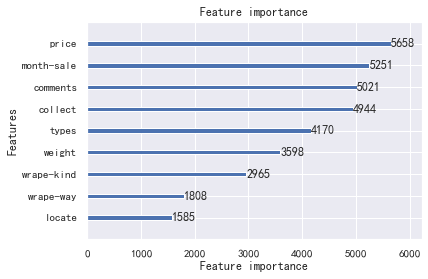

In [29]:
lightgbm.fit(x,y)
lgb.plot_importance(lightgbm)
plt.show()

In [30]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[17:33:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:35:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


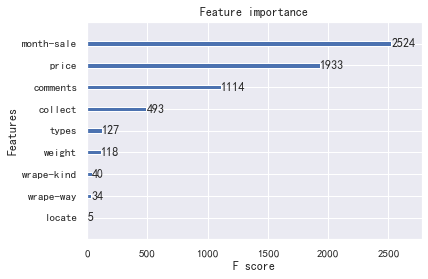

In [31]:
xgboost.fit(x,y)
xgb.plot_importance(xgboost)
plt.show()

In [51]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(x_train, y_train)

lightgbm


In [52]:
print('xgboost')
xgb_model_full_data = xgboost.fit(x_train, y_train)

xgboost
[15:36:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.5 * xgb_model_full_data.predict(X)) + \
            (0.5 * lgb_model_full_data.predict(X)))

In [56]:
# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(x_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.12863758605387013


In [67]:
data_yun = pd.read_excel('云南品种茶(1).xls')

In [68]:
data_yun.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,原产地,商品详情,包装方式,包装种类,形状,净含量,茶种类,收益
0,大益茶叶 普洱茶熟茶经典系列8592熟饼357g（1601）云南勐海,118.0,大益茶叶旗舰店,云南 昆明,94,5,117,2,产品参数：\n生产许可证编号：SC11453282228141\n厂名：勐海茶厂（普通合伙）...,包装,常规棉纸包装,饼茶,357,普洱茶熟茶,11092.0
1,大益茶叶 普洱茶熟茶 8592经典七子饼茶 357g1301批 云南勐海,148.0,大益茶叶旗舰店,云南 昆明,94,7,224,2,产品参数：\n生产许可证编号：SC11453282228141\n产品标准号：GB/T221...,包装,常规棉纸包装,饼茶,357,普洱茶熟茶,13912.0
2,丽皇香云南普洱茶老茶头普洱熟茶饼老班章古树金芽茶叶礼盒装500g,148.0,丽皇香旗舰店,福建 泉州,298,55741,86895,0,产品参数：\n生产许可证编号：SC11453080204639\n厂名：普洱林老根古树茶厂\...,包装,礼盒装,沱茶,500,普洱茶熟茶,44104.0
3,八马茶叶 云南原产信记号普洱茶大叶种晒青茶普洱熟茶饼茶357g,560.0,八马旗舰店,广东 深圳,280,1,4,0,产品参数：\n生产许可证编号：SC11453282248570\n厂名：勐海县杨聘号茶叶有限...,包装,盒装,饼茶,357,普洱茶熟茶,156800.0
4,7饼整提划算2499g 老班章普洱茶熟茶饼茶 云南七子饼茶叶海纳祥和,398.0,海纳祥和旗舰店,云南 西双版纳,400,406,736,2,产品参数：\n生产许可证编号：SC11453080216131\n厂名：普洱市金典茶业有限公...,包装,常规棉纸包装,饼茶,2499,普洱茶熟茶,159200.0


In [69]:
data_yun = data_yun.drop(['商品名','店铺名称','商品详情'],axis=1)

In [70]:
data_yun.head()

,单价/元,店铺位置,商品月销,商品评论数,商品人气,原产地,包装方式,包装种类,形状,净含量,茶种类,收益
0,118.0,云南 昆明,94,5,117,2,包装,常规棉纸包装,饼茶,357,普洱茶熟茶,11092.0
1,148.0,云南 昆明,94,7,224,2,包装,常规棉纸包装,饼茶,357,普洱茶熟茶,13912.0
2,148.0,福建 泉州,298,55741,86895,0,包装,礼盒装,沱茶,500,普洱茶熟茶,44104.0
3,560.0,广东 深圳,280,1,4,0,包装,盒装,饼茶,357,普洱茶熟茶,156800.0
4,398.0,云南 西双版纳,400,406,736,2,包装,常规棉纸包装,饼茶,2499,普洱茶熟茶,159200.0


In [71]:
data_yun.isnull().sum()

单价/元     0
店铺位置     0
商品月销     0
商品评论数    0
商品人气     0
原产地      0
包装方式     0
包装种类     0
形状       2
净含量      0
茶种类      0
收益       0
dtype: int64

In [72]:
data_yun['形状'] = data_yun['形状'].fillna('0')

In [73]:
data_yun.isnull().sum()

单价/元     0
店铺位置     0
商品月销     0
商品评论数    0
商品人气     0
原产地      0
包装方式     0
包装种类     0
形状       0
净含量      0
茶种类      0
收益       0
dtype: int64

In [112]:
data_yun.describe()

,单价/元,商品月销,商品评论数,商品人气,原产地,净含量,收益
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02
mean,336.737500,412.946429,6231.107143,11103.607143,1.053571,1135.035714,1.919019e+05
std,389.247402,663.854956,16406.832981,30085.982469,0.857813,925.516879,5.346013e+05
min,9.900000,0.000000,0.000000,4.000000,0.000000,30.000000,0.000000e+00
25%,128.000000,139.250000,116.000000,311.500000,0.000000,357.000000,1.597575e+04
50%,218.500000,249.000000,603.500000,1707.000000,1.000000,600.000000,5.388150e+04
75%,398.000000,471.250000,3178.750000,7782.500000,2.000000,2499.000000,1.468480e+05
max,2180.000000,6000.000000,124941.000000,243604.000000,2.000000,2499.000000,3.780000e+06


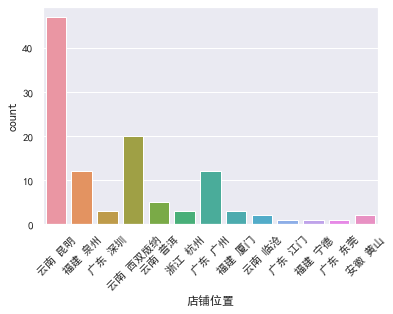

In [74]:
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xticks(rotation=45)
sns.countplot(data_yun['店铺位置'])

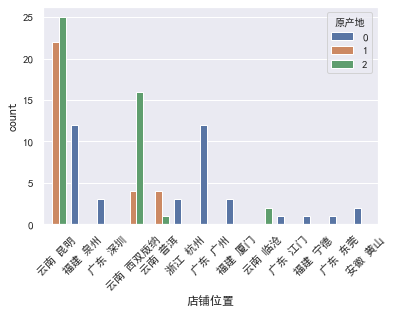

In [75]:
plt.xticks(rotation=45)
sns.countplot(data_yun['店铺位置'],hue=data_yun['原产地'])

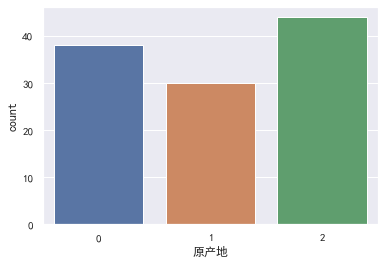

In [76]:
sns.countplot(data_yun['原产地'])

(array([58., 36.,  6.,  5.,  2.,  0.,  0.,  1.,  3.,  1.]),
 array([   9.9 ,  226.91,  443.92,  660.93,  877.94, 1094.95, 1311.96,
        1528.97, 1745.98, 1962.99, 2180.  ]),
 <a list of 10 Patch objects>)

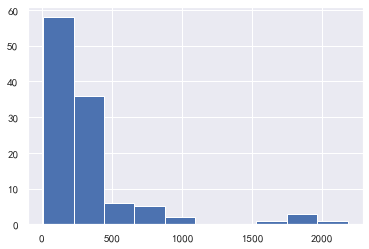

In [77]:
plt.hist(data_yun['单价/元'])

(array([95., 12.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.,  600., 1200., 1800., 2400., 3000., 3600., 4200., 4800.,
        5400., 6000.]),
 <a list of 10 Patch objects>)

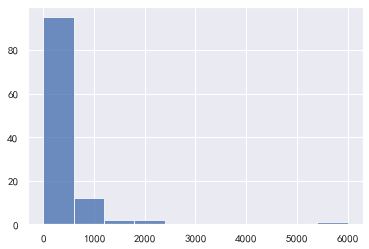

In [78]:
plt.hist(data_yun['商品月销'], alpha=0.8)

(array([97.,  8.,  3.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([     0. ,  12494.1,  24988.2,  37482.3,  49976.4,  62470.5,
         74964.6,  87458.7,  99952.8, 112446.9, 124941. ]),
 <a list of 10 Patch objects>)

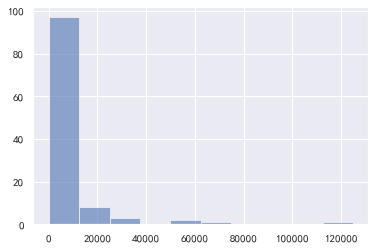

In [79]:
plt.hist(data_yun['商品评论数'], alpha=0.6)

(array([98.,  9.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([4.00000e+00, 2.43640e+04, 4.87240e+04, 7.30840e+04, 9.74440e+04,
        1.21804e+05, 1.46164e+05, 1.70524e+05, 1.94884e+05, 2.19244e+05,
        2.43604e+05]),
 <a list of 10 Patch objects>)

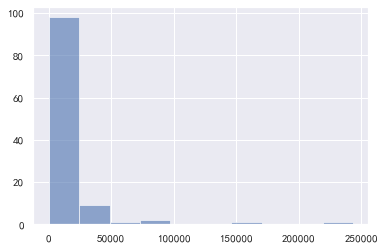

In [80]:
plt.hist(data_yun['商品人气'], alpha=0.6)

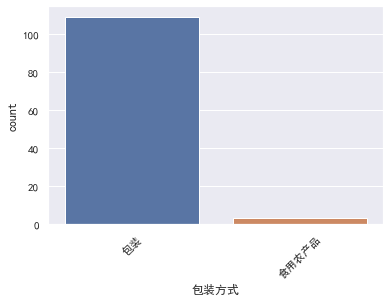

In [81]:
plt.xticks(rotation=45)
sns.countplot(data_yun['包装方式'])

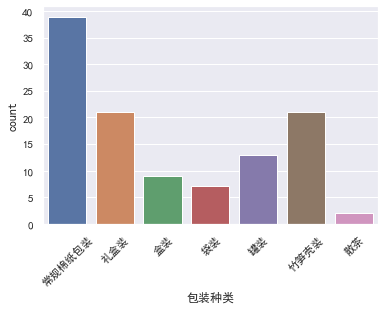

In [82]:
plt.xticks(rotation=45)
sns.countplot(data_yun['包装种类'])

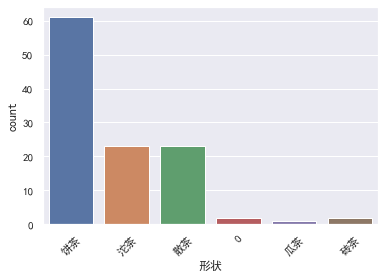

In [83]:
plt.xticks(rotation=45)
sns.countplot(data_yun['形状'])

(array([ 8., 47.,  7., 13.,  1.,  1.,  0.,  3.,  0., 32.]),
 array([  30. ,  276.9,  523.8,  770.7, 1017.6, 1264.5, 1511.4, 1758.3,
        2005.2, 2252.1, 2499. ]),
 <a list of 10 Patch objects>)

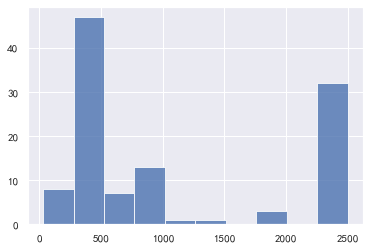

In [84]:
plt.hist(data_yun['净含量'], alpha=0.8)

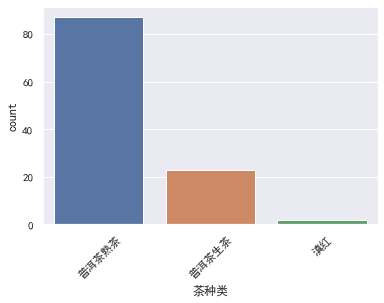

In [85]:
plt.xticks(rotation=45)
sns.countplot(data_yun['茶种类'])

In [89]:
data_chuan = pd.read_excel('四川品种茶(1).xls')

In [90]:
data_chuan.head()

,商品名,单价/元,店铺名称,店铺位置,商品月销,商品评论数,商品人气,原产地,商品详情,包装方式,包装种类,形状,净含量,茶种类,收益
0,蒙顶山茉莉花茶2020新茶四川梦唐飘雪兰雪浓香型特级毛尖茶叶250g,108.0,romanticbear888,四川 成都,81,507,7816,2,生产许可证编号: SC11451180300391\n产品标准号: GB/T18665\n厂...,包装,罐装,叶形,250,茉莉花茶,8748.0
1,【臻尖小雅】茉莉花茶2020新茶 特级浓香茶叶 四川茉莉花茶叶250g,98.0,臻尖茶业,四川 成都,68,105,2846,2,生产许可证编号: SC11451180300391\n厂名: 雅安市名山区香满堂茶厂\n厂址...,包装,盒装,NaN,250,茉莉花茶,6664.0
2,蒙顶山茶2020新茶兰香雪芽纯手工浓香型碧池兰妃兰花茶叶250g包邮,365.0,新汇茶业集团,四川 雅安,14,97,143,1,生产许可证编号: SC11451180300617\n厂名: 雅安市名山区雅茗源茶业有限公司...,散装,NaN,NaN,250,茉莉花茶,5110.0
3,2020新茶四川茶叶蒙顶山茶叶毛尖绿茶浓香型明前高山雪芽嫩芽250g,128.0,姿雅茶业,四川 雅安,4,41,230,1,品牌: 蒙顶山茶\n系列: 绿茶\n形状: 尖形\n产地: 中国大陆\n省份: 四川省\n城...,食用农产品,NaN,尖形,250,毛尖绿茶,512.0
4,2020新茶蒙顶山花茶毛峰四川茶叶特产茉莉花茶礼盒装浓香型送礼,129.0,map_team,重庆,7,14,58,0,生产许可证编号: SC11451180300852\n产品标准号: GB/T18665\n厂...,包装,礼盒装,环形,250,茉莉花茶,903.0


In [91]:
data_chuan = data_chuan.drop(['商品名','店铺名称','商品详情'],axis=1)

In [92]:
data_chuan.head()

,单价/元,店铺位置,商品月销,商品评论数,商品人气,原产地,包装方式,包装种类,形状,净含量,茶种类,收益
0,108.0,四川 成都,81,507,7816,2,包装,罐装,叶形,250,茉莉花茶,8748.0
1,98.0,四川 成都,68,105,2846,2,包装,盒装,NaN,250,茉莉花茶,6664.0
2,365.0,四川 雅安,14,97,143,1,散装,NaN,NaN,250,茉莉花茶,5110.0
3,128.0,四川 雅安,4,41,230,1,食用农产品,NaN,尖形,250,毛尖绿茶,512.0
4,129.0,重庆,7,14,58,0,包装,礼盒装,环形,250,茉莉花茶,903.0


In [93]:
data_chuan.isnull().sum()

单价/元      0
店铺位置      0
商品月销      0
商品评论数     0
商品人气      0
原产地       0
包装方式      0
包装种类     35
形状       50
净含量       0
茶种类       0
收益        0
dtype: int64

In [94]:
data_chuan['包装种类'] = data_chuan['包装种类'].fillna('0')
data_chuan['形状'] = data_chuan['形状'].fillna('0')

In [95]:
data_chuan.isnull().sum()

单价/元     0
店铺位置     0
商品月销     0
商品评论数    0
商品人气     0
原产地      0
包装方式     0
包装种类     0
形状       0
净含量      0
茶种类      0
收益       0
dtype: int64

In [113]:
data_chuan.describe()

,单价/元,商品月销,商品评论数,商品人气,原产地,净含量,收益
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02
mean,298.940179,263.125000,921.562500,3012.803571,1.250000,256.758929,7.853227e+04
std,406.622227,841.831734,1580.198304,5022.274959,0.493197,163.192047,2.511345e+05
min,17.000000,2.000000,1.000000,2.000000,0.000000,20.000000,1.782000e+02
25%,99.000000,27.000000,91.750000,228.750000,1.000000,106.000000,4.824000e+03
50%,152.500000,88.500000,273.000000,1043.000000,1.000000,250.000000,1.221600e+04
75%,288.000000,195.000000,770.250000,3083.250000,2.000000,500.000000,3.301350e+04
max,2280.000000,7000.000000,8043.000000,30714.000000,2.000000,500.000000,1.744712e+06


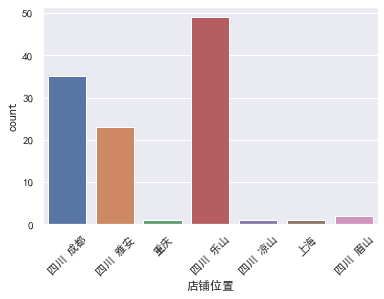

In [96]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['店铺位置'])

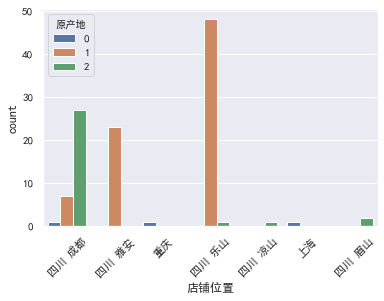

In [97]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['店铺位置'],hue=data_chuan['原产地'])

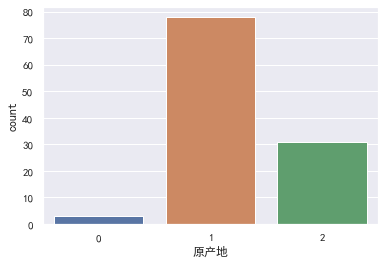

In [98]:
sns.countplot(data_chuan['原产地'])

(array([75., 24.,  1.,  6.,  0.,  0.,  2.,  0.,  3.,  1.]),
 array([  17. ,  243.3,  469.6,  695.9,  922.2, 1148.5, 1374.8, 1601.1,
        1827.4, 2053.7, 2280. ]),
 <a list of 10 Patch objects>)

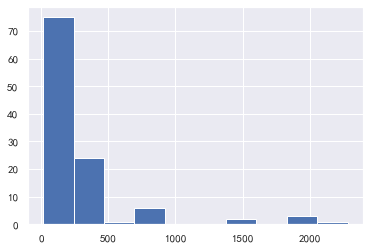

In [99]:
plt.hist(data_chuan['单价/元'])

(array([106.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([2.0000e+00, 7.0180e+02, 1.4016e+03, 2.1014e+03, 2.8012e+03,
        3.5010e+03, 4.2008e+03, 4.9006e+03, 5.6004e+03, 6.3002e+03,
        7.0000e+03]),
 <a list of 10 Patch objects>)

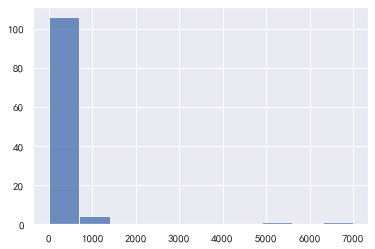

In [100]:
plt.hist(data_chuan['商品月销'], alpha=0.8)

(array([85.,  9.,  4.,  4.,  3.,  2.,  1.,  2.,  0.,  2.]),
 array([1.0000e+00, 8.0520e+02, 1.6094e+03, 2.4136e+03, 3.2178e+03,
        4.0220e+03, 4.8262e+03, 5.6304e+03, 6.4346e+03, 7.2388e+03,
        8.0430e+03]),
 <a list of 10 Patch objects>)

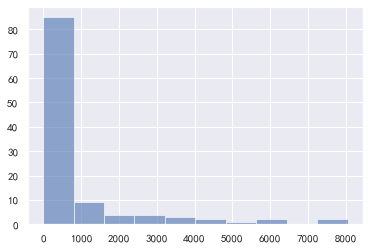

In [101]:
plt.hist(data_chuan['商品评论数'], alpha=0.6)

(array([84., 13.,  4.,  4.,  1.,  4.,  0.,  1.,  0.,  1.]),
 array([2.00000e+00, 3.07320e+03, 6.14440e+03, 9.21560e+03, 1.22868e+04,
        1.53580e+04, 1.84292e+04, 2.15004e+04, 2.45716e+04, 2.76428e+04,
        3.07140e+04]),
 <a list of 10 Patch objects>)

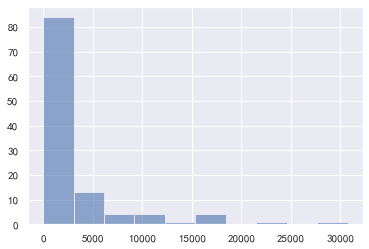

In [102]:
plt.hist(data_chuan['商品人气'], alpha=0.6)

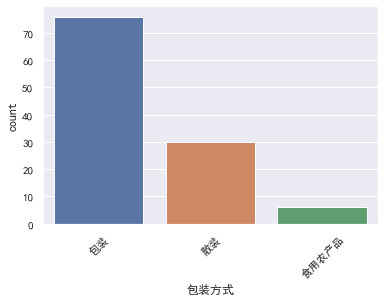

In [105]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['包装方式'])

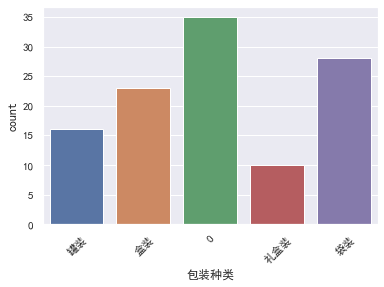

In [106]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['包装种类'])

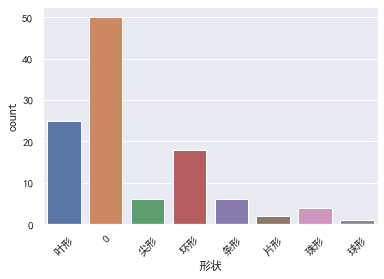

In [107]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['形状'])

(array([14., 19.,  8.,  2., 37.,  2.,  0.,  1.,  0., 29.]),
 array([ 20.,  68., 116., 164., 212., 260., 308., 356., 404., 452., 500.]),
 <a list of 10 Patch objects>)

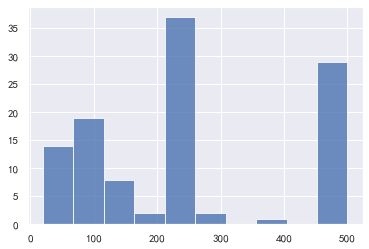

In [108]:
plt.hist(data_chuan['净含量'], alpha=0.8)

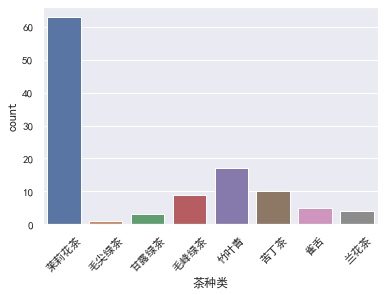

In [109]:
plt.xticks(rotation=45)
sns.countplot(data_chuan['茶种类'])